<a href="https://colab.research.google.com/github/pmalu9211/ML/blob/main/2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generating Data**

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")

<ipython-input-346-fa8f0961b7f2>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [347]:
def dataSetGenerator(m):
  X = np.random.randn(m)*10
  # X = np.random.random_sample(m)*100
  noise = np.random.randn(m)
  y = 3*X + 1 + 5*noise
  return X,y

In [348]:
def plotData(X,y,title,color):
  plt.scatter(X,y,color = color)
  plt.title(title)
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

In [349]:
def normailze(X):
  print(X.mean())
  print(X.std())
  return ((X - X.mean())/X.std())

-0.4213085903874562
10.102167860613186


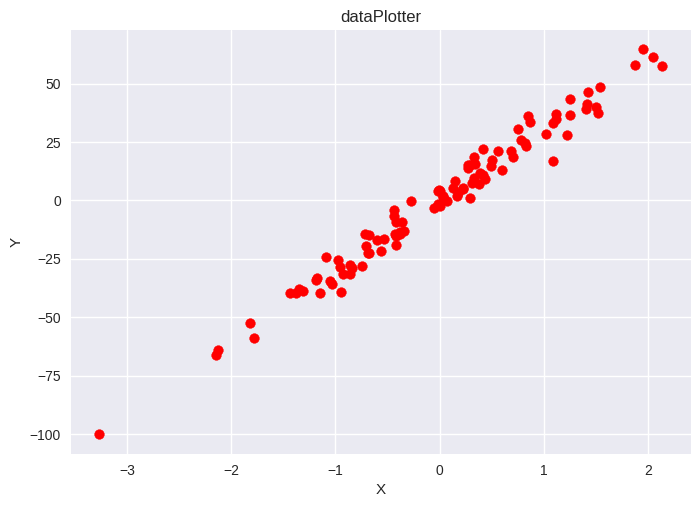

In [350]:
X,y = dataSetGenerator(100)
# print(X)
X = normailze(X)
# print(X)
plotData(X,y,"dataPlotter","red")

# Train Test data split

In [351]:
def trainTestSplit(X,y,split = 0.8):
  data = np.zeros(shape=(100,2))
  data[:,0] = X
  data[:,1] = y
  m = X.shape
  np.random.shuffle(data)
  split = int(split*m[0])
  Xtrain = data[:split,0]
  ytrain = data[:split,1]
  Xtest = data[split:,0]
  ytest = data[split:,1]
  return Xtrain, ytrain, Xtest, ytest

Xtrain, ytrain, Xtest, ytest = trainTestSplit(X,y)

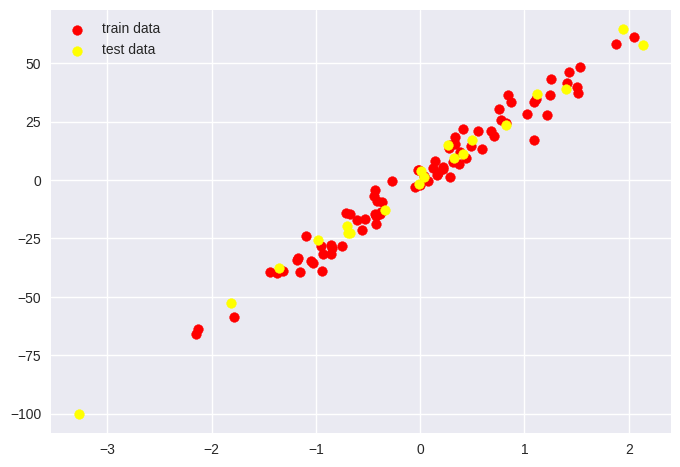

In [352]:
plt.scatter(Xtrain, ytrain, color = "red", label = "train data")
plt.scatter(Xtest, ytest, color = "yellow", label = "test data")
plt.legend()
plt.show()

# Gradient descent implementation

In [353]:
# y hat
def expectedVal(theta,xi):
  return (theta[0] + theta[1]*xi)

In [354]:
def loss(X,y,theta):
  m = X.shape[0]
  err = 0
  for i in range(m):
    err = err + ((expectedVal(theta, X[i]) - y[i]) ** 2)
    # print(expectedVal(theta, X[i]))
  return (err/(2*m))

In [355]:
def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))
  for i in range(m):
    val = (expectedVal(theta,X[i]) - y[i])
    grad[0] += val
    grad[1] += val*X[i]
  return grad/m

In [356]:
def train(X,y, lr = 0.1, itr = 100):
  theta = np.zeros(shape=(2,))
  # print("hello",theta[0])
  # print(theta)
  los = []
  for i in range(itr):
    theta = theta - lr*gradient(X,y,theta)
    los.append(loss(X,y,theta))
  plt.plot(los)
  return theta


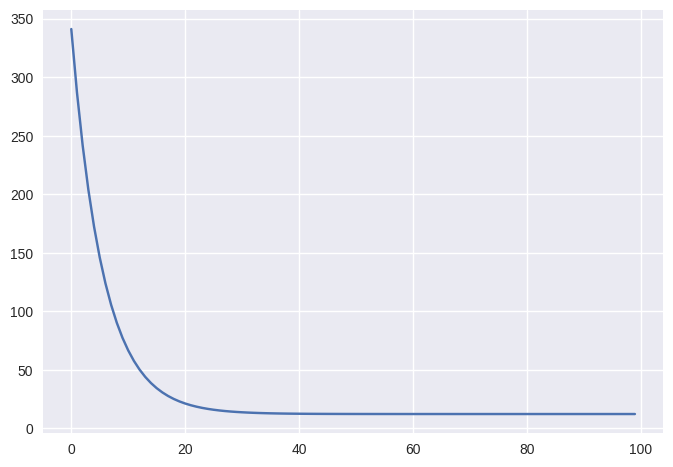

In [357]:
theta = train(Xtrain,ytrain)

# Testing data

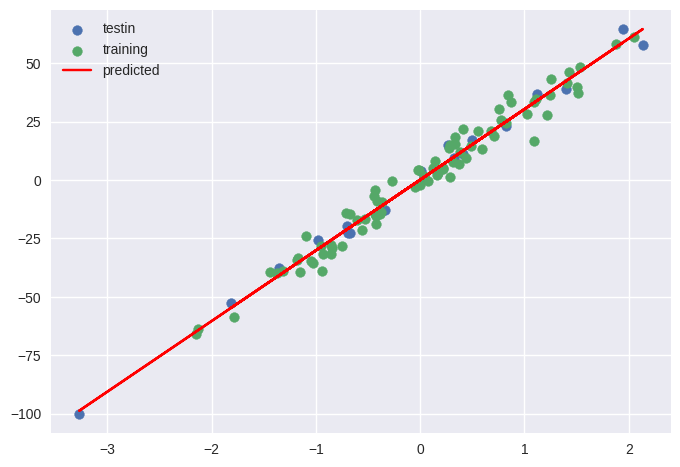

In [358]:
ypred = expectedVal(theta, Xtest)
plt.scatter(Xtest,ytest, label = "testin")
plt.scatter(Xtrain,ytrain, label = "training")
plt.plot(Xtest,ypred,label = "predicted", color = "red")
plt.legend()
plt.show()

#R2 score#
Evaluation method

In [359]:
def r2score(ypred,ytest):
  num = np.sum((ypred-ytest)**2)
  den = np.sum((ypred-ytest.mean())**2)
  return 1-(num/den)

In [363]:
yval = expectedVal(theta,Xtest)
r2score(yval, ytest)

0.9921562029095266

# Visualisation

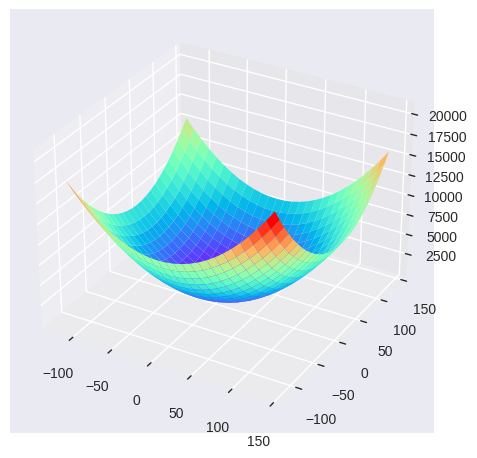

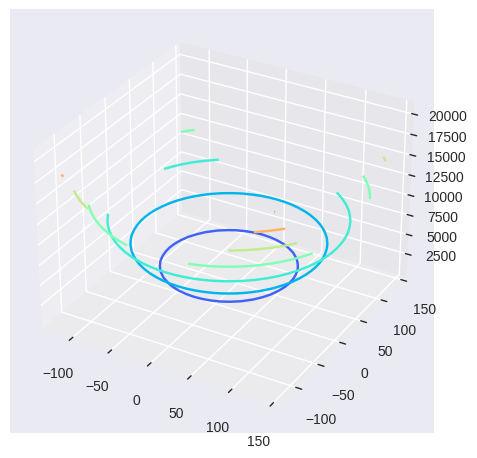

In [361]:
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i, j] * X + T0[i, j]
        J[i, j] = np.mean((y - yp)**2) / 2

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

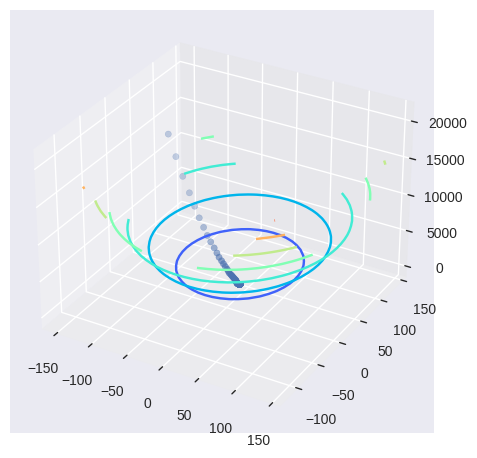

In [362]:
# Trace the trajectory of gradient
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(loss(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list



theta, theta_list, error_list = train(Xtrain,ytrain)


theta_list = np.array(theta_list)


fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()
